# Lab 10: Models of binary data and logistic regression

## Learning goals

- Understand the advantages and disadvantages of a linear probability model. 
- Understand the form of a logistic regression, and how it differs from a standard linear regression. 
- Be able to interpret the results of a logistic regression. 
- How to visualize the results of a logistic regression


## Literature
- ROS Ch. 13 (not 13.3, 13.5 and 13.6) and 14

Many events and decisions in life are binary: pass/fail, get the job or not, going bankrupt or not. In this lab, we will look in some detail at models to evaluate such data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns



In [2]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




### Voting

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=0fc99329-2583-4093-8838-af0900c9ba86&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

We start by loading in data on a US election survey from 1992 and voter characteristics, that has been downloaded from the ROS website

In [3]:
politics = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/nes.csv")
politics

,Unnamed: 0,year,resid,weight1,weight2,weight3,age,gender,race,educ1,...,parent_party,white,year_new,income_new,age_new,vote.1,age_discrete,race_adj,dvote,rvote
0,536,1952,1,1.0000,1.0000,1.0000,25,2,1,2,...,2.0,1,1,1,-2.052455,1.0,1,1.0,0.0,1.0
1,537,1952,2,1.0000,1.0000,1.0000,33,2,1,1,...,0.0,1,1,1,-1.252455,1.0,2,1.0,1.0,0.0
2,538,1952,3,1.0000,1.0000,1.0000,26,2,1,2,...,-2.0,1,1,0,-1.952455,1.0,1,1.0,0.0,1.0
3,539,1952,4,1.0000,1.0000,1.0000,63,1,1,2,...,NaN,1,1,0,1.747545,1.0,3,1.0,0.0,1.0
4,540,1952,5,1.0000,1.0000,1.0000,66,2,1,2,...,-2.0,1,1,-2,2.047545,1.0,4,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34903,39982,2000,1804,1.0454,1.0454,1.0454,51,2,1,2,...,NaN,1,24,0,0.547545,1.0,3,1.0,0.0,1.0
34904,39983,2000,1805,1.0454,1.0454,1.0454,52,2,1,2,...,NaN,1,24,-1,0.647545,NaN,3,1.0,NaN,NaN
34905,39984,2000,1808,2.0407,2.0407,2.0407,23,1,1,3,...,NaN,1,24,1,-2.252455,0.0,1,1.0,NaN,NaN
34906,39985,2000,1809,0.3717,0.3717,0.3717,36,2,1,4,...,NaN,1,24,0,-0.952455,0.0,2,1.0,1.0,0.0


There is one simple and under-appreciated model for binary data that ROS does not discuss. That is what is called a *Linear Probability Model*. Basically, you just run OLS with the normal 0/1 data on the left side. You can then interpret the coefficients as probabilities: 

Below the binary response variable, *rvote* indicates a 1 if a respondent who preferred George Bush in 1992 and 0 if they preferred Bill Clinton (A little history lesson for those of you who weren't born yet: this is referring to George HW Bush, father to George W. Bush who, confusingly, was also president. Bill Clinton won the 1992 election). 

*income* is an ordered categorical variable from 1 (poor) to 5 (rich)

We can subtract our income variable by 1 so that the intercept term in our regression corresponds to the lowest category (1) of income. 

In [14]:
politics92 = politics.loc[politics.year==1992].copy()
politics92["income_m1"] = politics92.income-1

In [15]:
mod1 = smf.ols(formula="rvote~income_m1", data=politics92).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rvote   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.23
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           9.60e-07
Time:                        11:54:03   Log-Likelihood:                -909.78
No. Observations:                1356   AIC:                             1824.
Df Residuals:                    1354   BIC:                             1834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2278      0.028      8.054      0.000       0.172       0.283
income_m1      0.0589      0.012      4.922      0.000       0.035       0.082
==============================================================================
Omnibus:                     7972.680   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.817
Skew:                           0.602   Prob(JB):                     1.85e-48
Kurtosis:                       1.438   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The nice thing about the linear probability model is that it is simple to interpret, and we can easily use all of the inference tools for OLS that we have used up until now. 

The intercept, .23, can be interpreted as the probability of a voter in the lowest (1) category preferring the republican (George Bush).

For every increase in income category, the probability of preferring the republican increases by, on average 5.9%. So someone in the largest income category would have a $.23 + 4*.059 \approx .47$ probability of preferring the replublican. 

So what is wrong with the above model. Actually, the linear probability model seems to work quite ok here. We might want to do our normal checks (see last lab) to see if this is a good fitting model, but at first glance it seems reasonable. 

But imagine if we had data with some variables with observations at the extremes. So, for example, perhaps we had a continuous income variable, and we had a few billionaires in the sample. Our model might then suggest that these people had a more than 100% probability of voting for a republican. This, clearly is problematic. 

We can generate some fake data to demonstrate.

<AxesSubplot:>

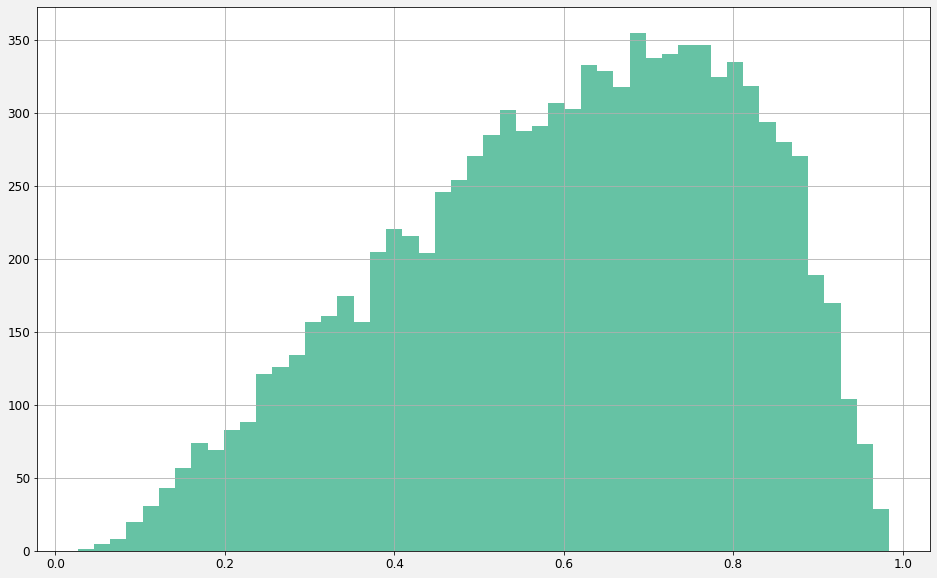

In [16]:

#Here we generate income data as coming from a normal distribution. 
#We assume a de-meaned data, so it is centered around 0
income = pd.Series(spt.norm.rvs(0,100,size=10000)) # some de-meaned distribution of income
income

#create correlation between income and probabilities of voting
xs = .5 + .01*income

#inverse logit converts to 0-1 scale
ps = pd.Series([np.exp(x)/(1+np.exp(x)) for x in xs])

ps.hist(bins=50)

In [17]:
#generate 0,1 data based on probabilities above using a bernoulli distribution

vote = np.array([spt.bernoulli.rvs(p, size=1) for p in ps])

vote = vote.flatten()

vote

array([1, 0, 1, ..., 1, 1, 1])

In [18]:

f_df = pd.DataFrame({"income":income, "vote":vote})
f_df

,income,vote
0,29.591771,1
1,92.434680,0
2,23.906410,1
3,-17.874557,1
4,-113.337889,0
...,...,...
9995,6.390314,0
9996,-27.207364,1
9997,-51.567032,1
9998,95.526646,1


<AxesSubplot:>

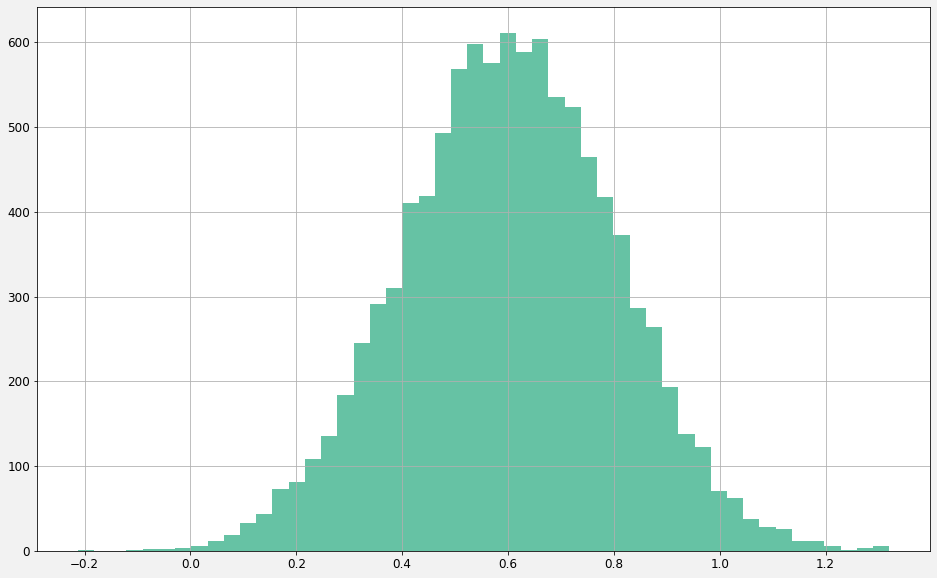

In [19]:
#Now we run a linear probability regression of vote on income
fmod1 = smf.ols(formula="vote~income", data=f_df).fit()
fmod1.summary()
predictions = pd.Series(fmod1.predict())
predictions.hist(bins=50)

Here we see that the predictions from the linear probability model will indicate that some of predictions will go outside the 0-1 bounds, which is problematic when interpreting the predictions as probabilities. 

(Some (See, for example, Angrist and Pischke, *Mostly Harmless Econometrics*), argue that the benefits outweigh the costs of linear probability models. In many cases, the problem with predicted probabilities not being between 0-1) is not that important if the primary purpose is inference, rather than prediction. It can often also be the case that range of predictions does not approach the bounds. 

For example, in the example above, it would be highly unlikely that any broad socio-economic group would, on average, have a predicted probability of voting for a certain party that was either close to 0 or close to 1. There were plenty of very rich people in 1992 that voted for Bill Clinton. 

### Logistic regression

But if we are concerned about predictions close to the 0-1 boundaries, or if we otherwise think that the assumptions of the linear probability model (normality, linearity for example). The solution is to do **logistic regression**, which basically does a non-linear transformation of the data in order to constrain the fitted values to be between 0 and 1 - what we call the **inverse logit**: $(\frac{e^x}{1-e^x})$. This is what we used above to convert our fake data to "probabilities" between 0 and 1

Below we run a logistic regression using statsmodels:

In [246]:
flog_mod0 = smf.glm(formula="vote~income", data=f_df, family=sm.families.Binomial()).fit()
flog_mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   vote   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5785.3
Date:                Mon, 21 Feb 2022   Deviance:                       11571.
Time:                        07:38:31   Pearson chi2:                 9.94e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1703
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4871      0.023     21.384      0.000       0.442       0.532
income         0.0102      0.000     37.838      0.000       0.010       0.011
==============================================================================
"""

A few things to parse in the above regression. 

- GLM: Notice we are not using OLS any more. Instead we are now in the realm of "Generalized Linear Models", estimated by maximum likelihood. The "Generalized" here means we are no longer constrained to the assumption of a normal distribition. In this case, we indicate that we have a binomial distribution (this is what the "family" parameter is for). 

- Link function: GLM models are also characterized by a "link" function. This really is nothing more than a transformation of the y-variable. Here the link function is the *logit* function, since we are estimating a model that looks like: 

$$logit(vote_i) = a + b*income_i$$

Or equivalently

$$vote_i = invlogit(a+b*income_i)$$

- We are able to estimate the parameters we put into the model, but because of the non-linear logit/invlogit transformation, we can not interpret the coefficients as probabilities as in the linear probability model, or for that matter in any other straight-forward way (more on this below)

- There is no $\sigma$ term in the output: In the logistic regression there is no seperate error term. The model uncertainty comes from the mapping of the 0/1 data to probabilities (the binomial distribution)

### Real data with logistic.

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=32c6a3d9-4cec-4e3e-9daa-af0900c9ba89&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Now let's use the logistic regression to fit our actual data, as in ROS (p.218-219): 

In [94]:
mod1 = smf.glm(formula="rvote~income", data=politics.loc[politics.year==1992], family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  rvote   No. Observations:                 1356
Model:                            GLM   Df Residuals:                     1354
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -867.26
Date:                Wed, 07 Sep 2022   Deviance:                       1734.5
Time:                        14:17:01   Pearson chi2:                 1.36e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4528      0.185     -7.832      0.000      -1.816      -1.089
income         0.2668      0.055      4.844      0.000       0.159       0.375
==============================================================================
"""

In [33]:
#Add some "jitter" to the data to make them easier to chart
N = politics.shape[0]
income_j = politics.income + spt.uniform(-.25,.5).rvs(size=N)
rvote_j = politics.rvote + spt.uniform(-.05,.1).rvs(size=N)

In [34]:
mod1.params

Intercept   -1.452783
income       0.266840
dtype: float64

In [23]:
def invLogit(x):
    return(np.exp(x)/(1+np.exp(x)))

Text(0, 0.5, 'Pr Republican Vote')

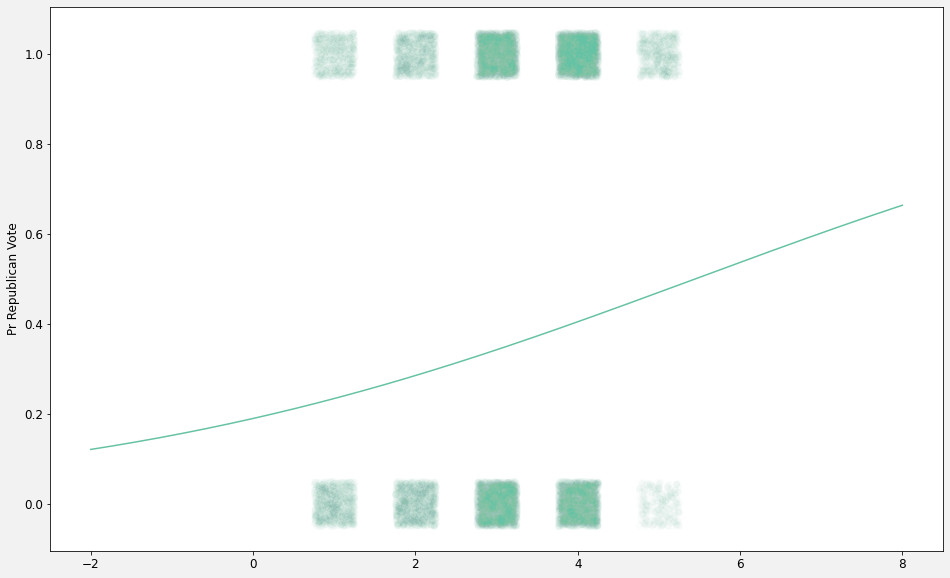

In [35]:


N = politics.shape[0]

a = mod1.params[0]
b = mod1.params[1]

x_line = np.linspace(-2,8,N)
y_line = invLogit(a+b*x_line)



fig, ax = plt.subplots()
ax.scatter(income_j, rvote_j, alpha=.02)
ax.plot(x_line,y_line)
ax.set_ylabel("Pr Republican Vote")



So above we can see the estimated probability on the y-axis and the jittered data at the top and bottom. 

We extended the x-axis in the chart to show clearly that the regression line is non-linear. The equation for our regression line is: 

$$Pr(y_i = 1) = invlogit(-1.45 + .26x)$$

Since the curve is non-linear, we can't give a simple slope estimate - the slope is changing along the entire curve!

(I am unsure why the results are slightly different than those shown in the book for this regression. As far as I can see, they should be largely the same. Likely the data sets used are somewhat different). 

If we want to interpret the regression results, we need to convert to the probability scale by using the inverse logit function. So, for example, if we want to see what the probability of someone in the the 3 income category for voting republican we would compute: 

In [36]:
invLogit(mod1.params[0] + mod1.params[1]*3)

0.34247946844264443

If we want to see the difference in probability of voting for the republican comparing, for example, groups 3 and 4 we could evaluation: 

In [37]:
invLogit(mod1.params[0] + mod1.params[1]*4)-invLogit(mod1.params[0] + mod1.params[1]*3)

0.0623397542703194

### Divide-by-four rule

ROS (p.229) explains that diving the regression coefficient by 4 can be used as a quick approximation for an upper-bound on the probabilistic interpretation of the coefficient. 

So in the above regression we can take the estimated coefficient on the income variable:

.23/4 = .058

(Compare this to the estimated coefficient in the Linear Probability Model. 

### Prediction

We can generate a prediction point estimate from our model with *predict*

In [38]:
# Predict

mod1.predict(exog=dict(income=4))


0    0.404819
dtype: float64

To get out more information, including standard error and confidence intervalls, we can use the *get_prediction* command:

In [154]:
myPredictions = mod1.get_prediction(exog=dict(income=4))
print(myPredictions.predicted_mean) #point estimate
print("Standard Error, ", myPredictions.se_mean)
print("95% CI: ", myPredictions.conf_int())

[0.40481922]
Standard Error,  [0.01741404]
95% CI:  [[0.37119786 0.43935806]]


### Displaying the result of multiple regression. 

We can also replicate the figure (ROS p.222)  showing the results for multiple regressions. We can run the regressions efficiently using *groupby*, and then iterating over the groups: 


In [39]:
presidential = np.arange(1952,2001, 4)


politics_pres = politics.loc[politics.year.isin(presidential)].copy()

election_groups = politics_pres.groupby("year")

labels = []
income_b = []
income_SE = []

for year, election in election_groups: 
    #when we iterate through a grouped data frame,
    #we get a tuple: basically a list with two items--a label (the grouped variable)--and the data frame
    labels.append(year) 
    mod_m = smf.glm(formula="rvote~income", data=election, family=sm.families.Binomial()).fit()
    income_b.append(mod_m.params[1])
    vcov = mod_m.cov_params()
    income_SE.append(np.sqrt(vcov.iloc[1,1]))
    

labels = pd.Series(labels)
income_b = pd.Series(income_b)
income_SE = pd.Series(income_SE)

In [40]:
ci_low = income_b - income_SE
ci_high = income_b + income_SE

Text(0, 0.5, 'Coefficient of income')

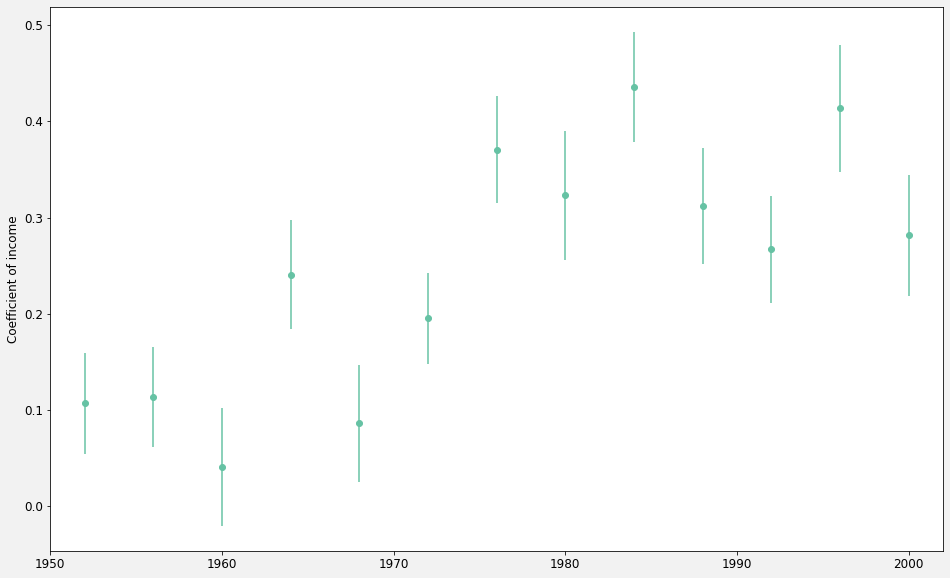

In [41]:
fig, ax = plt.subplots()
ax.scatter(labels, income_b)
ax.vlines(x=labels, ymin=ci_low, ymax=ci_high)
ax.set_xlim(1950,2002)
ax.set_ylabel("Coefficient of income")

The above shows the coefficient on income. The lines represent +/- 1 standard deviations, so you can think of them as 68% confidence intervalls

### Oil drilling

Let's move to a slightly more complicated modelling situation. We will load in data on historical well-drilling on the Norwegian Continental Shelf between 1966 and through 2019. 

In [4]:
drilling = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/drilling.csv")

Data is incomplete for 2020, so we will delete the rows from that year: 

In [5]:
drilling = drilling.loc[drilling.year!=2020].copy()

In [6]:
drilling

,year,NpdidLicence,orgnr,nDrills,nDry,LongName,ValidFrom,ValidTo,revenues,oper_revenues,...,d_brent_neg,d_brent_pos_l1,d_brent_pos_l2,d_brent_neg_l1,d_brent_neg_l2,licenceStart,licenceYears,licenceOwnerYears,d2005,nComp
0,1966,20756,914048990,1,0.0,Esso Exploration and Production Norway A/S,1965-09-01,2004-10-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1965-09-01,1,1,0,5
1,1966,20780,914048990,1,1.0,Esso Exploration and Production Norway A/S,1965-09-01,1977-09-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1965-09-01,1,1,0,5
2,1967,20756,914048990,3,3.0,Esso Exploration and Production Norway A/S,1965-09-01,2004-10-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1965-09-01,2,2,0,5
3,1967,20804,927533081,1,1.0,Amoco Norway Oil Company,1965-09-01,1989-04-14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1965-09-01,2,2,0,5
4,1967,20884,948138646,1,1.0,Phillips Petroleum Company Norway,1965-09-01,1968-01-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1965-09-01,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12547,2015,917484,989795848,0,0.0,Det norske oljeselskap ASA,2009-12-22,2016-09-30,1158683.0,1221802.0,...,-0.637438,0.000000,0.000000,-0.092486,-0.027887,1999-12-15,16,6,1,38
12548,2016,917484,989795848,0,0.0,Aker BP ASA,2009-12-22,2017-12-11,1129939.0,1117697.0,...,-0.181405,0.000000,0.000000,-0.637438,-0.092486,1999-12-15,17,7,1,34
12549,2016,917484,989795848,0,0.0,Det norske oljeselskap ASA,2009-12-22,2017-12-11,1129939.0,1117697.0,...,-0.181405,0.000000,0.000000,-0.637438,-0.092486,1999-12-15,17,7,1,34
12550,2017,917484,989795848,0,0.0,Aker BP ASA,2016-09-30,2018-05-16,2575654.0,2562933.0,...,0.000000,0.000000,0.000000,-0.181405,-0.637438,1999-12-15,18,1,1,30


This is a rather complicated dataset because the underlying structure of the industry it comes from is quite complex. 

In order to do exploratory drilling in the Norwegian territorial waters (known as the Norwegian Continental Shelf), you first need to obtain a licence for a certain geographic block. 

The observations in this data set are company-licence-years: That is to say, every row represents one company on a given licence for a given year. 

The variable nDrills represents the number of exploratory wells a company has drilled in a year within a licence. Let us first simplify this to ask whether a company has drilled or not in a given year: 

In [45]:
drilling["drilled"] = np.where(drilling.nDrills>0, 1, 0)

### Descriptives

We can start out with some quick descriptives. One question is how the probability of drilling has changed over time. So we can aggregate by year and get the mean probability of drilling: 

<AxesSubplot:xlabel='year'>

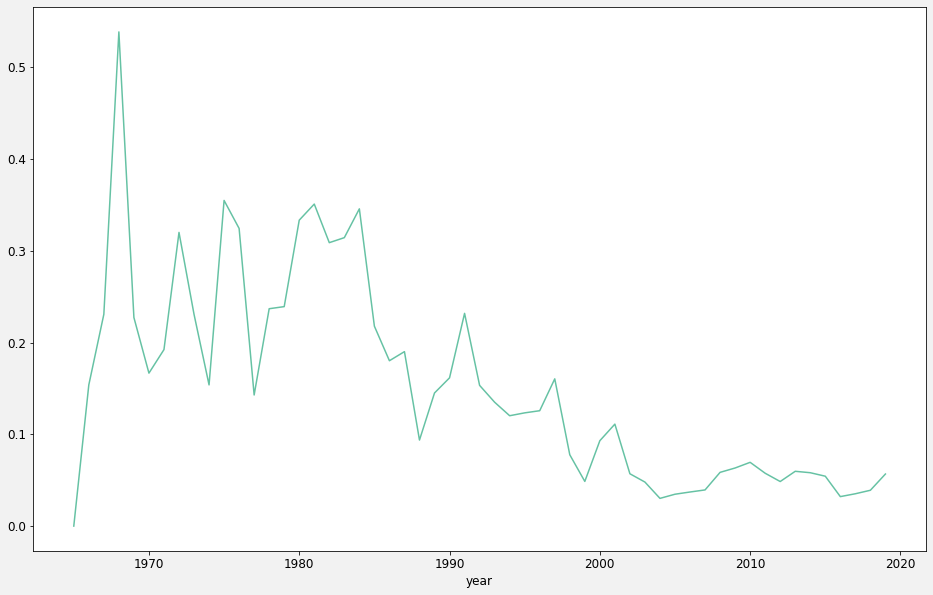

In [46]:
prByYear = drilling.groupby("year")["drilled"].aggregate(np.mean)
prByYear.plot()

Here it looks like a lot of variation, but generally the probability of drilling seems to have declined markedly. 

In [47]:
drill_mod1 = smf.glm(formula="drilled~year", data=drilling, family=sm.families.Binomial()).fit()

In [48]:
drill_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                drilled   No. Observations:                12528
Model:                            GLM   Df Residuals:                    12526
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3293.5
Date:                Wed, 07 Sep 2022   Deviance:                       6586.9
Time:                        13:50:49   Pearson chi2:                 1.26e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.3713      4.978     20.764      0.000      93.614     113.129
year          -0.0528      0.002    -21.220      0.000      -0.058      -0.048
==============================================================================
"""

Using our quick divide-by-4 rule, we could quickly estimate that on average the probability of drilling has declined by $5.2/4 \approx 1.3\%$ per year 

Text(0, 0.5, 'Pr Drilling')

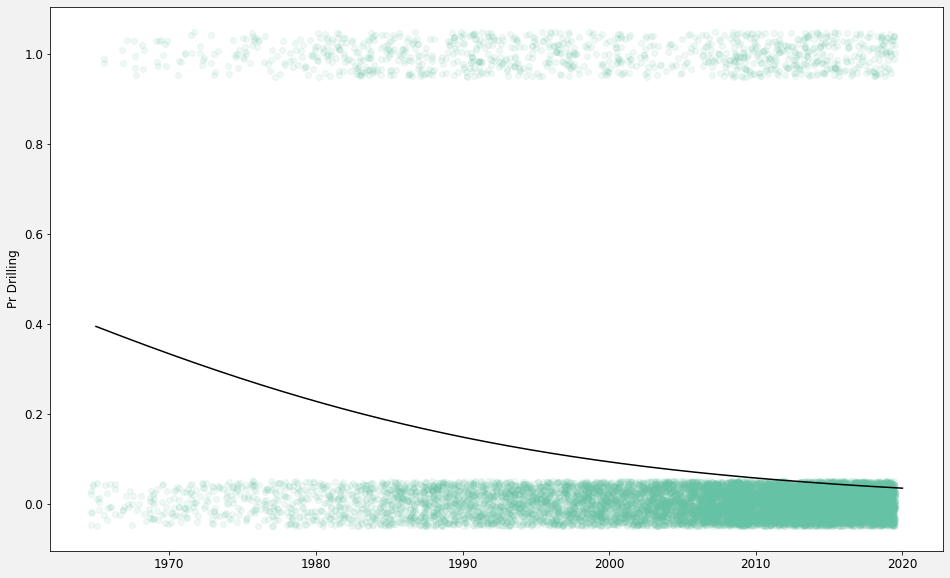

In [49]:
N = drilling.shape[0]

a = drill_mod1.params[0]
b = drill_mod1.params[1]

x_line = np.linspace(1965,2020,N)
y_line = invLogit(a+b*x_line)



year_j = drilling.year + spt.uniform(-.5,1).rvs(size=N)
drilled_j = drilling.drilled + spt.uniform(-.05,.1).rvs(size=N)

fig, ax = plt.subplots()
ax.scatter(year_j, drilled_j, alpha=.1)
ax.plot(x_line,y_line, color="black")
ax.set_ylabel("Pr Drilling")

Now we have a declining time-trend in our model. We can notice that the probability of drilling towards the end of the period gets quite close to 0. This can be a good reason to prefer the logistic regression in this case, rather than a linear-probability model. 

Let us now ask whether the oil price effects the probability of drilling. We don't have information for the oil price for the entire history of our oil drilling (only starting in 1987), so let us limit the data set to where we have information on the oil price. 

In [50]:
drillingOil = drilling.loc[drilling.brent_l1.notna()].copy()

In our model we will include both the current year's oil price and a one-year lag of oil the price. The indicator for the oil price is *brent*, referring to the *brent crude oil* indicator, which is a type of oil common in north sea. 

In [51]:
drill_mod2 = smf.glm(formula="drilled~year + brent + brent_l1", data=drillingOil, family=sm.families.Binomial()).fit()

In [52]:
drill_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                drilled   No. Observations:                11476
Model:                            GLM   Df Residuals:                    11472
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.4
Date:                Wed, 07 Sep 2022   Deviance:                       5366.8
Time:                        13:51:00   Pearson chi2:                 1.16e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.9980     13.450      8.550      0.000      88.637     141.359
year          -0.0587      0.007     -8.705      0.000      -0.072      -0.045
brent         -0.0038      0.002     -1.553      0.120      -0.009       0.001
brent_l1       0.0069      0.002      2.815      0.005       0.002       0.012
==============================================================================
"""

The coefficients above are hard to interpret. For example, the intercept represents the value (on the linear scale) where year and oil price equal zero. Let's try centering our variables. The brent price we can also divide by the standard deviation, so that we can interpret the coefficient as standard deviations from the mean (ROS recommends dividing by 2 standard deviations, but that makes most sense when there indicator or categorical variables in the regression):

In [53]:
drillingOil["year_c"] = drillingOil.year - drillingOil.year.unique().mean()
drillingOil["brent_s"] = (drillingOil.brent - drillingOil.brent.unique().mean())/drillingOil.brent.unique().std()
drillingOil["brent_l1_s"] = (drillingOil.brent_l1 - drillingOil.brent_l1.unique().mean())/drillingOil.brent_l1.unique().std()
print("Brent, std", drillingOil.brent_l1.unique().std())

Brent, std 32.07939939017523


Notice above that we take the mean of the unique values of brent oil and year. This is because all observations in a given year

In [54]:
drill_mod3 = smf.glm(formula="drilled~year_c + brent_s + brent_l1_s", data=drillingOil, family=sm.families.Binomial()).fit()

In [55]:
drill_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                drilled   No. Observations:                11476
Model:                            GLM   Df Residuals:                    11472
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.4
Date:                Wed, 07 Sep 2022   Deviance:                       5366.8
Time:                        13:51:07   Pearson chi2:                 1.16e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5137      0.039    -63.746      0.000      -2.591      -2.436
year_c        -0.0587      0.007     -8.705      0.000      -0.072      -0.045
brent_s       -0.1206      0.078     -1.553      0.120      -0.273       0.032
brent_l1_s     0.2204      0.078      2.815      0.005       0.067       0.374
==============================================================================
"""

We see that the brent oil price is estimated to be negative, though with a relatively large standard error. Using the divide-by-4 rule, we could quickly say that an increase in the oil price by 1 standard deviation would lower the probability of drilling by $-.12/4 \approx -.03$. 

But how robust is this? Looking at the standard error, we see that there is a good deal of uncertainty related to the estimate, and the 95% confidence interval (+/- 2*SE) covers a wide range, including zero. So perhaps we should discount this counter-intuitive result. 

On the other hand the 1-year lagged oil price is estimated to be positive, and almost double as large in magnitude, while the standard error is the same size. We can interpret the point estimate quickly as $.22/4 \approx .055$, so a one standard deviation increase in the lagged oil price, increases the probability of drilling the following year by .055. 

At first, this might appear quite significant, but recall from above, that a one standard deviation in the oil price corresponds to a change of 32 dollars/barrell - a big swing!



### Plotting results and uncertainty. 

In [56]:
mean_brent = drillingOil.brent_s.unique().mean()
mean_brent_l1 = drillingOil.brent_l1_s.unique().mean()


print(mean_brent, mean_brent_l1)

1.3530843112619095e-16 1.3183898417423734e-16


In [57]:
drillingOil.year - drillingOil.year.unique().mean()

265     -15.5
266     -15.5
267     -15.5
268     -15.5
269     -15.5
         ... 
12547    11.5
12548    12.5
12549    12.5
12550    13.5
12551    15.5
Name: year, Length: 11476, dtype: float64

In [58]:
year_labels = np.arange(1988,2020,1)
year_labels

array([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [59]:
N = drillingOil.shape[0]

a = drill_mod3.params[0]
b_year = drill_mod3.params[1]
b_brent = drill_mod3.params[2]
b_brentl1 = drill_mod3.params[3]



year_new = np.linspace(-15.5,15.5,N)
y_line = invLogit(a+b_year*year_new) 
#Since we centered the oil price variables around the mean, excluding these variables (setting them==0) 
#is equivalent to holding the oil price variables at their mean variables


year_j = drillingOil.year_c + spt.uniform(-.5,1).rvs(size=N)
drilled_j = drillingOil.drilled + spt.uniform(-.05,.1).rvs(size=N)



In [60]:
y_line

array([0.16748796, 0.16746584, 0.16744373, ..., 0.03156702, 0.03156217,
       0.03155733])

Text(0, 0.5, 'Pr Drilling')

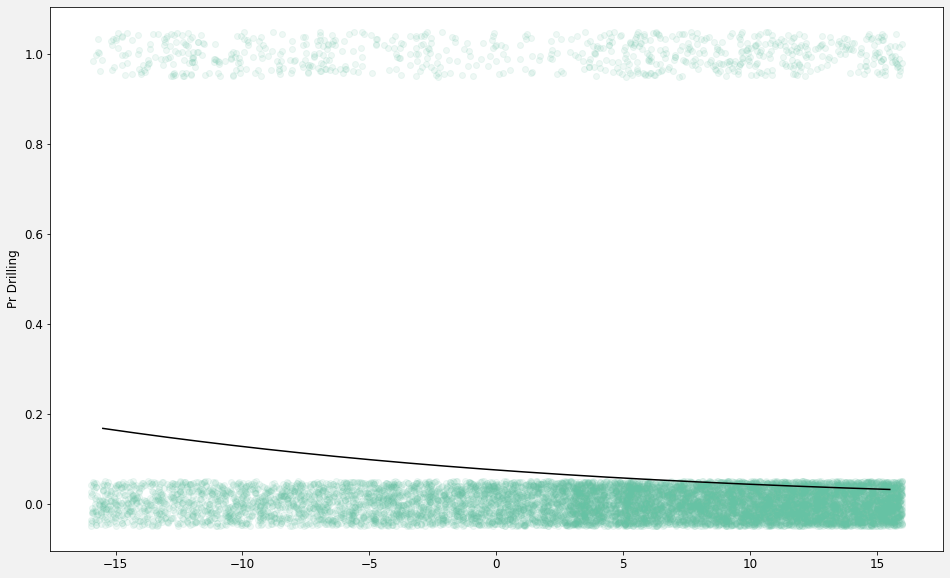

In [61]:
fig, ax = plt.subplots()
ax.scatter(year_j, drilled_j, alpha=.1)
ax.plot(year_new,y_line, color="black")
ax.set_ylabel("Pr Drilling")

Now let's show the effect of a high-price scenario, with oil prices a standard deviation higher (32 dollars)

In [62]:
y_line_high = invLogit(a+b_year*year_new + b_brent*1 +  b_brentl1*1)



Text(0, 0.5, 'Pr Drilling')

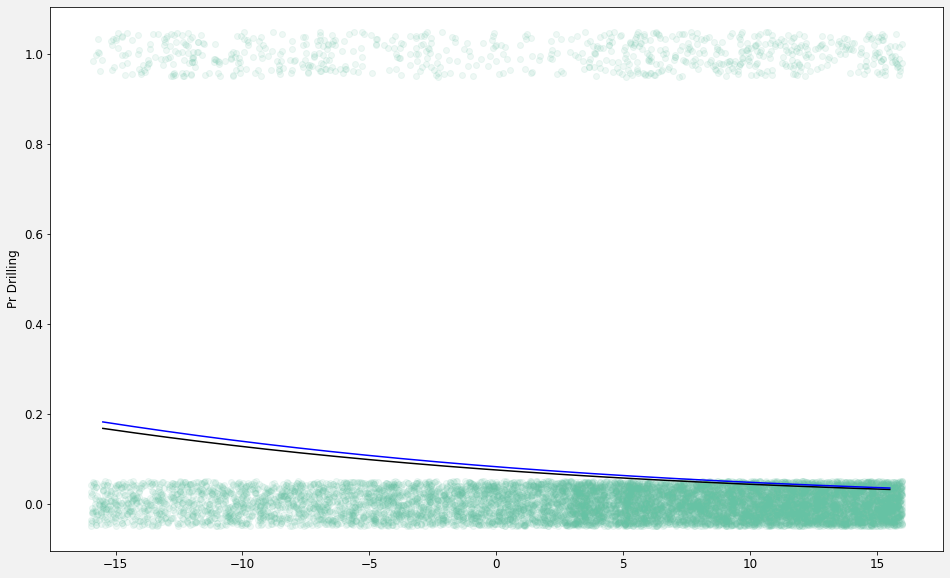

In [63]:
fig, ax = plt.subplots()
ax.scatter(year_j, drilled_j, alpha=.1)
ax.plot(year_new,y_line, color="black")
ax.plot(year_new,y_line_high, color="blue")
ax.set_ylabel("Pr Drilling")

Viewed in this way, the effect that the oil price has on the probability of drilling looks rather modest. 

### Simulating and displaying uncertainty in a logistic regression


We can also generate inferential and predictive uncertainty through simulation. 

Recall, from lab 9, our function for generating inferential uncertainty. We will adopt this for our logistic regression: 

In [68]:
def logSim(regMod): 
    #extract values from regression model
    nmk = regMod.df_resid #n-k
    bs_vcov = regMod.cov_params() #we extract the scaled vcov matrix
    V_sim =np.array(bs_vcov)*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    bs = regMod.params
    
    #create simulated values
    bs_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return(bs_sim.flatten())


In [69]:
nsim = 50

bs_sims = []

for s in range(nsim):
    param_sim = logSim(drill_mod3)
    bs_sims.append(param_sim)
    

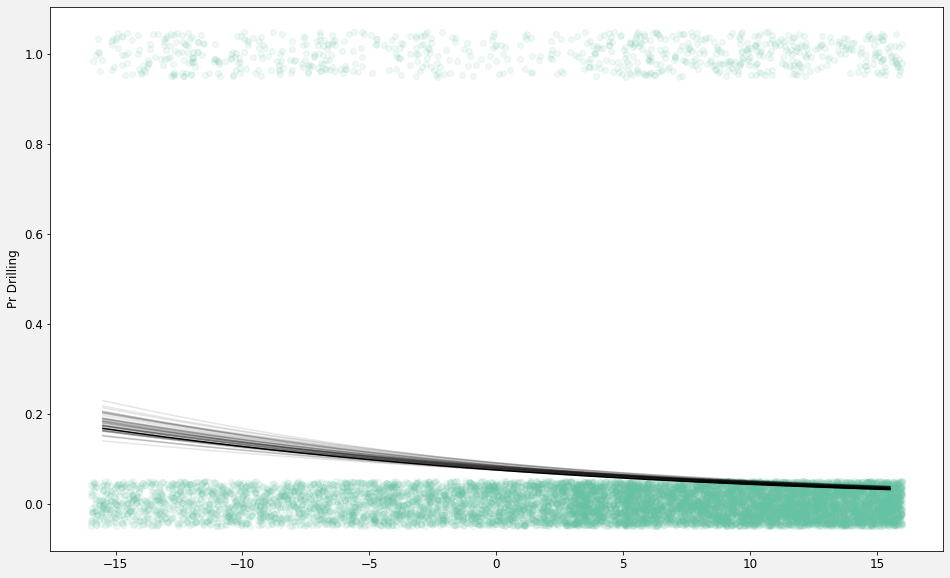

In [70]:
fig, ax = plt.subplots()
ax.scatter(year_j, drilled_j, alpha=.1)
ax.plot(year_new,y_line, color="black")
ax.set_ylabel("Pr Drilling")

for i in range(nsim):
    y_line_sim = invLogit(bs_sims[i][0] + bs_sims[i][1]*year_new + bs_sims[i][2]*1 + bs_sims[i][3])
    ax.plot(year_new, y_line_sim, color="black", alpha=.1)



We can also generate predictive uncertainty to the model. We recall, there is no $\epsilon$ value in our model or correspond $\sigma$ term. The extra, predictive uncertainty comes instead from the binomial distribution. 

Below, we will generate a predictive distribution for the probability of drilling in the year corresponding to 15.5 (2019) and an oil price that is two standard deviations over the mean value (about 100 dollars a barrel). 

In [86]:
#A new observation in the year 15.5 (2019) 
#with an oil price two standard deviations over the mean value (around 100 dollars)

n=100
year_new = 15.5
oil_new = 2
oil_l_new = 2

nsim = 4000

bs_sims = []
drilling_sim = []

for s in range(nsim):
    param_sim = logSim(drill_mod3)
    bs_sims.append(param_sim)
    p_new = invLogit(param_sim[0] + param_sim[1]*year_new + param_sim[2]*oil_new + param_sim[3]*oil_l_new)
    drilling_sim.append(spt.binom.rvs(100, p_new)) #a binomial with n=100 draws, and probability of success p_new


drilling_sim = pd.Series(drilling_sim)


What we get back are a set of simulations with different outcomes of how many drilling events we observe of the 100 that are completed. We can show this distribution below:

<AxesSubplot:>

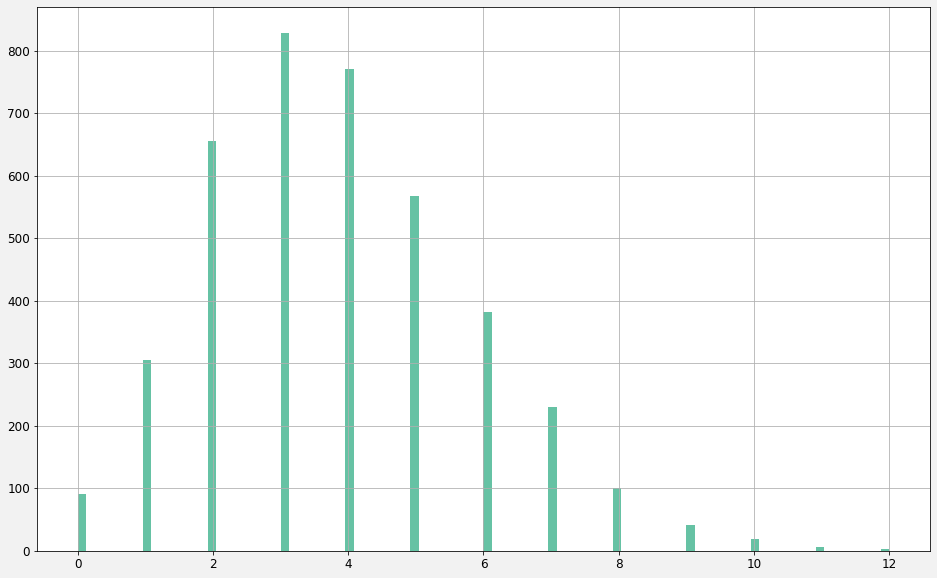

In [87]:
drilling_sim.hist(bins=100)

By dividing by n=100, we get the mean predicted probability of drilling

In [89]:
np.mean(drilling_sim)/n

0.03848

We can also estimate the standard error

In [92]:
np.std(drilling_sim)/100

0.019708871099075917

# Assignment

## 1. Oil Drilling

Consider the prediction of drilling based on the logistic regression above (drill_mod3). Say that there are 50 licenceses active in 2019 (year=15.5) and that the oil price (and its lag) is 1.5 standard deviations above its mean. 

Simulate the number of drilling events that will happen on those 50 licences and show the distribution of the number of drilling events. 

If the price increases to 2 standard deviations above its mean, how will that change the amount of drilling. Show the distribution of this difference. 

## 2. Free question 

Find your own data where you have a binary variable. Set up and interpret a logistic model using appropriate visualisations of the model results. 